3.Pandas

(b) Use the read_csv(...) method from Pandas (Documentation Link) to read data
from file Salaries.csv and to copy it into a dataframe.

In [2]:
import pandas as pd
df = pd.read_csv("../data/Homework 0 Data/Salaries.csv")
df


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


(c) Make the column playerID in the csv file as the index column and the first row
as the header. Also, skip the second row when reading the file.

In [3]:
df1 = pd.read_csv("../data/Homework 0 Data/Salaries.csv", header=0, index_col=3, skiprows=[1])
df1

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


(d) Select the id of the players who are registered in ATL and HOU whose salary is
higher than one million.

In [4]:
df[(df['teamID'] =='HOU') | (df['teamID'] =='ATL') & (df['salary']>1000000)]['playerID']

10       hornebo01
15       murphda05
20       suttebr01
202      ashbyal01
203       basske01
           ...    
25055    singljo02
25056     sippto01
25057    springe01
25058    thatcjo01
25059    valbulu01
Name: playerID, Length: 1178, dtype: object

(e) Use the describe() method to calculate the standard deviation, first quartile, median, third quartile, mean, maximum, and minimum of the salary in team ATL.

In [5]:
data_e = df[df['teamID'] =='ATL'].describe()
data_e

,yearID,salary
count,886.000000,8.860000e+02
mean,1999.708804,2.206239e+06
std,8.775471,3.432673e+06
min,1985.000000,6.000000e+04
25%,1992.000000,3.000000e+05
50%,1999.000000,6.000000e+05
75%,2007.000000,2.390625e+06
max,2015.000000,1.606180e+07


(f) Create a Python dictionary object whose keys are the headers of the dataframe
created in the read_csv() exercise and values are Python list objects that contain
data corresponding to the headers. (Here, use the iterrows() method to iterate
each row of the dataframe and copy it to a dictionary. However, there is an easier
way. Learn how the to_dict() method works by yourself later)

In [6]:
# f
data_dic = dict()
data_dic['yearID'] = []
data_dic['teamID'] = []
data_dic['lgID'] = []
data_dic['playerID'] = []
data_dic['salary'] = []

for id, row in df.iterrows():
    data_dic['yearID'].append(row['yearID'])
    data_dic['teamID'].append(row['teamID'])
    data_dic['lgID'].append(row['lgID'])
    data_dic['playerID'].append(row['playerID'])
    data_dic['salary'].append(row['salary'])

print(data_dic)

data_dic2 = df.to_dict()


{'yearID': [1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985

(g) Create a dataframe using pd.DataFrameRead (Documentation Link) and from
the dictionary created in (e). Then, change the header to "a", "b", "c", ... .

In [7]:
# g
import numpy as np
input = np.array(data_e).reshape(2,8)
df2 = pd.DataFrame(np.array(input), columns=['a','b','c','d','e','f','g','h'])
# df2 = pd.DataFrame(data_e)
df2

,a,b,c,d,e,f,g,h
0,886.0,886.0,1999.708804,2.206239e+06,8.775471,3.432673e+06,1985.0,60000.0
1,1992.0,300000.0,1999.000000,6.000000e+05,2007.000000,2.390625e+06,2015.0,16061802.0


4.Numpy

(a) Create a 2-dimensional Python list object, then convert it to a Numpy array
object.

In [8]:
# a
n = np.array([[1,2],[3,4],[5,6]])
n

array([[1, 2],
       [3, 4],
       [5, 6]])

(b) Examine the ndim, shape, size, dtype, itemsize, and data attributes of the numpy
array object. Make sure you understand their functions.

In [9]:
# b
print(n.ndim, n.shape, n.size, n.dtype, n.itemsize, n.data)

2 (3, 2) 6 int64 8 <memory at 0x7f8608d81ad0>


(c) Learn the dimension concept of an ndarray object by using reshape() and flatten()
methods.

In [10]:
# c
np.reshape(n, [1,6])

array([[1, 2, 3, 4, 5, 6]])

In [11]:
print(n)
n.flatten()


[[1 2]
 [3 4]
 [5 6]]


array([1, 2, 3, 4, 5, 6])

(d) Understand how the slice operation works for 1-D arrays and 2-D arrays and
practice by yourself.

In [12]:
# d
print(n[1:, :1])
print(n[1:2, 0:1]) # [left, right)

[[3]
 [5]]
[[3]]


(e) Learn operations on ndarray by examining the argmin(), argmax(), min(), max(),
mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), and mod()
methods. Make yourself comfortable with these methods.

In [13]:
# e
print(n.argmin(axis=1)) # index array of min value in given axis
print(n.argmax())
print(n.min(), n.max(axis=0))
print(n.mean(), n.max(), n.std())
print(n.dot(np.array([1,2])))
print(np.sqrt(n))
print(np.abs(n))
print(np.exp(n))
print(np.sin(n))
print(np.mod(n,2))

[0 0 0]
5
1 [5 6]
3.5 6 1.707825127659933
[ 5 11 17]
[[1.         1.41421356]
 [1.73205081 2.        ]
 [2.23606798 2.44948974]]
[[1 2]
 [3 4]
 [5 6]]
[[  2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003]
 [148.4131591  403.42879349]]
[[ 0.84147098  0.90929743]
 [ 0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155 ]]
[[1 0]
 [1 0]
 [1 0]]


(f) Examine the arange(), ones(), zeros(), eye(), linspace(), and concatenate() methods.
 Make yourself comfortable with these methods.

In [14]:
# f
print('np.arange:', np.arange(3))
print('np.ones:', np.ones([2, 2]))
print('np.zeros:', np.zeros([2, 2, 2]))
print('eye:', np.eye(3))
print('linspace()', np.linspace(start=1,stop=2,num=3))
print('concatenate()', np.concatenate((np.array([1,2]), np.array([3,4]))))

np.arange: [0 1 2]
np.ones: [[1. 1.]
 [1. 1.]]
np.zeros: [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]
eye: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
linspace() [1.  1.5 2. ]
concatenate() [1 2 3 4]


7. Matplotlib

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel,
ylabel, grid.

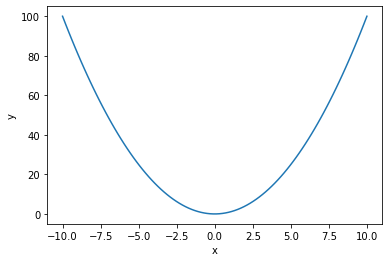

In [15]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = np.array([j ** 2 for j in x])
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add
text/mathematical equations on the plot.

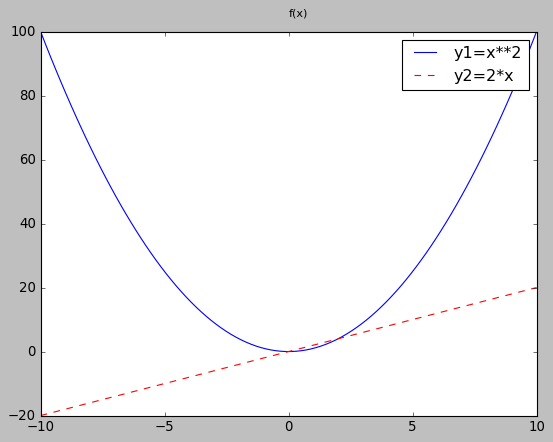

In [16]:
plt.style.use('classic')
y1 = 2*x
l1=plt.plot(x, y, label='y1=x**2')
l2=plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--', label='y2=2*x')
plt.text(0,105,'f(x)', fontsize=10)
plt.legend()
plt.show()

(c) Create multiple subplots, play around with the figure size, text font/size.

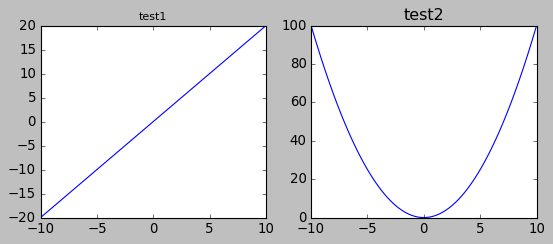

In [17]:
plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x, 2*x)
plt.title('test1', fontsize=10)

plt.subplot(122)
plt.plot(x, x*x)
plt.title('test2')
plt.show()

(d) Get familiar with get current axis (gca) handle to do the above tasks

<AxesSubplot:>

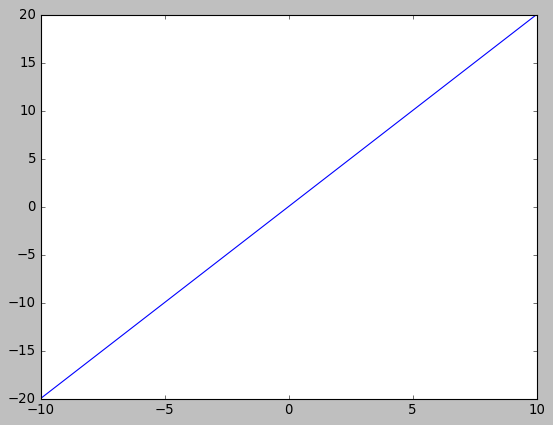

In [18]:
# gca() returns the current axes (a matplotlib.axes.Axes instance)
plt.plot(x, 2*x)
plt.gca()

(e) Change the limits on x and y axes, use logarithmic axes to plot.

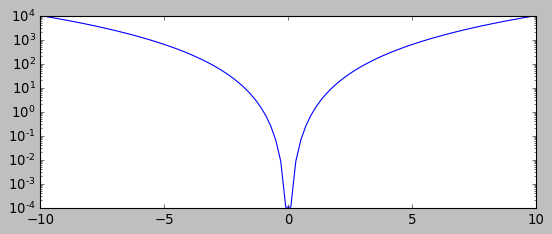

In [19]:
plt.figure(figsize=(8,3))
plt.plot(x, x**4)
plt.yscale('log')
plt.show()

8. Seaborn
Quick start:https://seaborn.pydata.org/introduction.html

(a) Use the Salaries.csv file in Pandas section.

In [20]:
df = pd.read_csv("../data/Homework 0 Data/Salaries.csv")
df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


(b) Create a dataframe and try to plot it with seaborn.

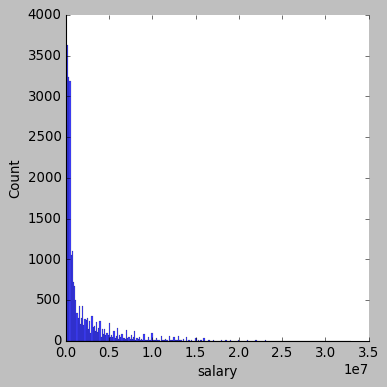

In [21]:
import seaborn
seaborn.displot(df['salary'])

(c) Perform statistical estimation on the data using seaborn in-built
functions - lmplot, catplot, relpolt.

In [22]:
# pip install seaborn==0.11.0

<function abs(x, /)>

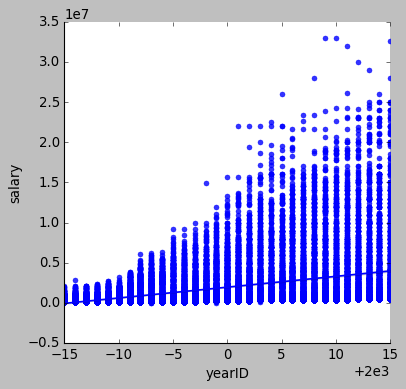

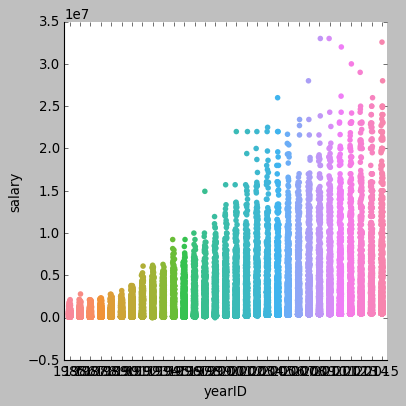

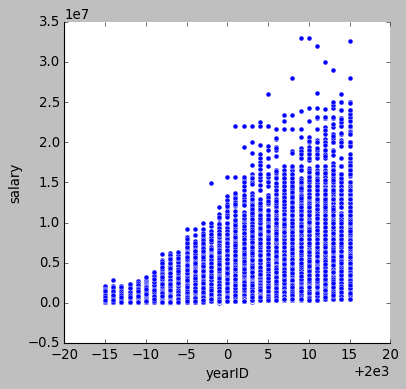

In [23]:
seaborn.lmplot(x='yearID', y='salary', data=df)
seaborn.catplot(x='yearID', y='salary', data=df)
seaborn.relplot(x='yearID', y='salary', data=df)
abs

(d) Create axis level functions like boxplot to visualize

<AxesSubplot:xlabel='teamID', ylabel='salary'>

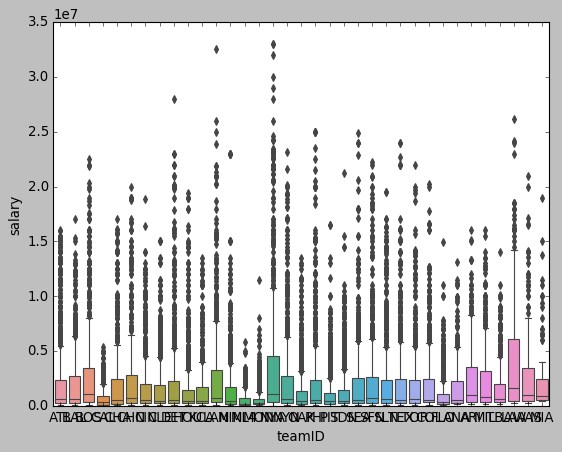

In [24]:
seaborn.boxplot(x='teamID', y='salary', data=df)

(e) Visualize the dataset structure using pairplot and jointplot.

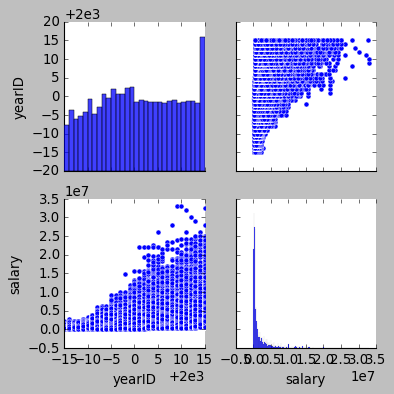

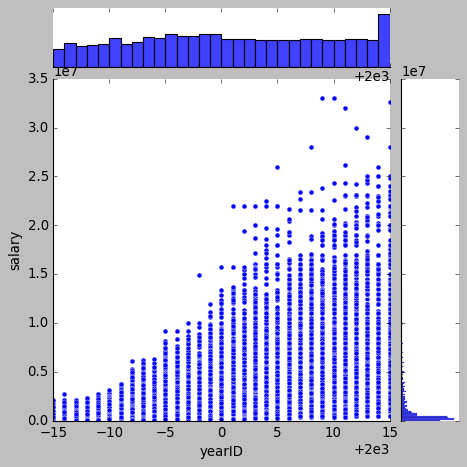

In [25]:
seaborn.pairplot(df, vars=['yearID', 'salary'])
seaborn.jointplot(data=df, x='yearID', y='salary')